In this notebook we use publicly available health care data to illustrate the use of some python libraries. We will plot health care expenditure per municipality and how health care varies with age. In the process you will see how libraries like pandas and matplotlib work.




# Health care expenditures per municipality



We start with health care data on the level of municipalities. We will plot how health care expenditure varies with location.

Some institutional background:

-   in the Netherlands health insurance is mandatory
-   people aged 18 or older face a deductible of 365 euros in 2014; no deductible for people below 18
-   the deductible applies to a number of cost categories in the "basic packages"; see below
-   people can &#x2013;voluntarily&#x2013; increase their deductible with 100, 200, 300, 400 or 500 euro; but our data has no information on this




## loading the data



The following code block loads the data. We use data from [Vektis](http://www.vektis.nl/index.php/vektis-open-data). We import the data, which is a 'csv' file with ";" as separator between columns. We also import the pandas library.

Then we inspect the first ten rows of our data set.



In [1]:
# First lets clear all previous python imports and variables by resetting the python kernel.
%reset -f


import pandas as pd

df_gemeente = pd.read_csv('Vektis_Open_Databestand_Zorgverzekeringswet_2014_-_gemeente.csv', sep = ';')

df_gemeente.head(10)

%matplotlib inline

We are going to be interested in total health care costs under the deductible. Hence, we specify the categories that fall under the deductible in the Netherlands in 2014.
Further, we want to do this analysis in English. So we relabel the relevant column names into English.

We specify a list of columns (cost categories) across which we want to add costs. As the costs are total costs (not costs per head) we can indeed add these numbers. We leave out mental health care as it features its own financial incentives.

We specify the name of a new variable `health_expenditure_under_deductible` which is calculated on the list of columns specified and then the function that needs to be applied &#x2013; `sum` in this case. Finally, we specify that the function needs to be applied row-wise: `axis=1`.

Then we give a dictionary with "old" variable names (in Dutch) and the "new" names in English for the variables where we want to use the English names.



In [2]:
cost_categories_under_deductible = ['KOSTEN_MEDISCH_SPECIALISTISCHE_ZORG', 'KOSTEN_MONDZORG', 'KOSTEN_FARMACIE', 'KOSTEN_HULPMIDDELEN', 'KOSTEN_PARAMEDISCHE_ZORG_FYSIOTHERAPIE', 'KOSTEN_PARAMEDISCHE_ZORG_OVERIG', 'KOSTEN_ZIEKENVERVOER_ZITTEND', 'KOSTEN_ZIEKENVERVOER_LIGGEND', 'KOSTEN_GRENSOVERSCHRIJDENDE_ZORG', 'KOSTEN_GERIATRISCHE_REVALIDATIEZORG', 'KOSTEN_OVERIG']
df_gemeente['health_expenditure_under_deductible'] = df_gemeente[cost_categories_under_deductible].sum(axis=1)

df_gemeente = df_gemeente.rename_axis({
'GESLACHT':'sex',
'LEEFTIJDSKLASSE':'age',
'GEMEENTENAAM':'MUNICIPALITY',
'AANTAL_BSN':'number_citizens',
'KOSTEN_MEDISCH_SPECIALISTISCHE_ZORG':'hospital_care',
'KOSTEN_FARMACIE':'pharmaceuticals',
'KOSTEN_TWEEDELIJNS_GGZ':'mental_care',
'KOSTEN_HUISARTS_INSCHRIJFTARIEF':'GP_capitation',
'KOSTEN_HUISARTS_CONSULT':'GP_fee_for_service',
'KOSTEN_HUISARTS_OVERIG':'GP_other',
'KOSTEN_MONDZORG':'dental care',
'KOSTEN_PARAMEDISCHE_ZORG_FYSIOTHERAPIE':'physiotherapy',
'KOSTEN_KRAAMZORG':'maternity_care',
'KOSTEN_VERLOSKUNDIGE_ZORG':'obstetrics'
}, axis='columns')

df_gemeente.dtypes

sex                                     object
age                                     object
MUNICIPALITY                            object
number_citizens                          int64
AANTAL_VERZEKERDEJAREN                 float64
hospital_care                          float64
pharmaceuticals                        float64
mental_care                            float64
GP_capitation                          float64
GP_fee_for_service                     float64
GP_other                               float64
KOSTEN_HULPMIDDELEN                    float64
dental care                            float64
physiotherapy                          float64
KOSTEN_PARAMEDISCHE_ZORG_OVERIG        float64
KOSTEN_ZIEKENVERVOER_ZITTEND           float64
KOSTEN_ZIEKENVERVOER_LIGGEND           float64
maternity_care                         float64
obstetrics                             float64
KOSTEN_GENERALISTISCHE_BASIS_GGZ       float64
KOSTEN_GRENSOVERSCHRIJDENDE_ZORG       float64
KOSTEN_EERSTE

We drop the columns that we no longer need.



In [3]:
df_gemeente.drop(['AANTAL_VERZEKERDEJAREN',
'KOSTEN_HULPMIDDELEN',
'KOSTEN_PARAMEDISCHE_ZORG_OVERIG',
'KOSTEN_ZIEKENVERVOER_ZITTEND',
'KOSTEN_ZIEKENVERVOER_LIGGEND',
'KOSTEN_GRENSOVERSCHRIJDENDE_ZORG',
'KOSTEN_GERIATRISCHE_REVALIDATIEZORG',
'KOSTEN_OVERIG',
'KOSTEN_GENERALISTISCHE_BASIS_GGZ',
'KOSTEN_EERSTELIJNS_ONDERSTEUNING'],inplace=True,axis=1)
df_gemeente.columns

Index(['sex', 'age', 'MUNICIPALITY', 'number_citizens', 'hospital_care',
       'pharmaceuticals', 'mental_care', 'GP_capitation', 'GP_fee_for_service',
       'GP_other', 'dental care', 'physiotherapy', 'maternity_care',
       'obstetrics', 'health_expenditure_under_deductible'],
      dtype='object')

Let's look again at the first couple of lines of our data set. The `head` method presents the first 5 line as default.



In [4]:
df_gemeente.head()

,sex,age,MUNICIPALITY,number_citizens,hospital_care,pharmaceuticals,mental_care,GP_capitation,GP_fee_for_service,GP_other,dental care,physiotherapy,maternity_care,obstetrics,health_expenditure_under_deductible
0,NaN,NaN,NaN,298383,48661669.94,9219422.33,7475481.90,4092492.35,1388439.07,3041904.41,1249229.61,418648.30,1286545.5,1072906.37,86677435.03
1,M,0 t/m 4 jaar,AA EN HUNZE,507,473370.77,43305.49,14056.81,26239.56,12829.29,36034.65,9311.14,15968.80,0.0,0.00,576750.31
2,M,0 t/m 4 jaar,AALBURG,428,340442.37,23395.86,5555.83,21673.15,9417.98,20159.19,7213.81,6135.05,0.0,0.00,406856.55
3,M,0 t/m 4 jaar,AALSMEER,876,932841.57,54597.52,34355.66,43971.27,22413.37,61629.32,19042.00,20086.43,0.0,0.00,1093297.37
4,M,0 t/m 4 jaar,AALTEN,667,515879.78,43516.71,2404.19,33749.10,18472.64,46720.61,12909.41,20762.75,0.0,0.00,652523.86


We are not interested in the first line, so we drop it. Indeed, our data set now starts with the first municipality 'AA EN HUNZE'.



In [5]:
df_gemeente.drop(df_gemeente.index[[0]], inplace=True)
df_gemeente.head()

,sex,age,MUNICIPALITY,number_citizens,hospital_care,pharmaceuticals,mental_care,GP_capitation,GP_fee_for_service,GP_other,dental care,physiotherapy,maternity_care,obstetrics,health_expenditure_under_deductible
1,M,0 t/m 4 jaar,AA EN HUNZE,507,473370.77,43305.49,14056.81,26239.56,12829.29,36034.65,9311.14,15968.80,0.0,0.0,576750.31
2,M,0 t/m 4 jaar,AALBURG,428,340442.37,23395.86,5555.83,21673.15,9417.98,20159.19,7213.81,6135.05,0.0,0.0,406856.55
3,M,0 t/m 4 jaar,AALSMEER,876,932841.57,54597.52,34355.66,43971.27,22413.37,61629.32,19042.00,20086.43,0.0,0.0,1093297.37
4,M,0 t/m 4 jaar,AALTEN,667,515879.78,43516.71,2404.19,33749.10,18472.64,46720.61,12909.41,20762.75,0.0,0.0,652523.86
5,M,0 t/m 4 jaar,ACHTKARSPELEN,810,766456.80,88084.16,6681.81,41477.79,19157.34,53633.01,16695.10,23423.96,0.0,0.0,954494.16


  sex             age   MUNICIPALITY  number\_citizens  hospital\_care  \\
1   M   0 t/m  4 jaar    AA EN HUNZE              507      473370.77   
2   M   0 t/m  4 jaar        AALBURG              428      340442.37   
3   M   0 t/m  4 jaar       AALSMEER              876      932841.57   
4   M   0 t/m  4 jaar         AALTEN              667      515879.78   
5   M   0 t/m  4 jaar  ACHTKARSPELEN              810      766456.80   

   pharmaceuticals  mental\_care  GP\_capitation  GP\_fee\_for\_service  GP\_other  \\
1         43305.49     14056.81       26239.56            12829.29  36034.65   
2         23395.86      5555.83       21673.15             9417.98  20159.19   
3         54597.52     34355.66       43971.27            22413.37  61629.32   
4         43516.71      2404.19       33749.10            18472.64  46720.61   
5         88084.16      6681.81       41477.79            19157.34  53633.01   

   dental care  physiotherapy  maternity\_care  obstetrics  \\
1      9311.14       15968.80             0.0         0.0   
2      7213.81        6135.05             0.0         0.0   
3     19042.00       20086.43             0.0         0.0   
4     12909.41       20762.75             0.0         0.0   
5     16695.10       23423.96             0.0         0.0   

   health\_expenditure\_under\_deductible  
1                            576750.31  
2                            406856.55  
3                           1093297.37  
4                            652523.86  
5                            954494.16  

Now let's consider data types.



In [6]:
df_gemeente.dtypes

sex                                     object
age                                     object
MUNICIPALITY                            object
number_citizens                          int64
hospital_care                          float64
pharmaceuticals                        float64
mental_care                            float64
GP_capitation                          float64
GP_fee_for_service                     float64
GP_other                               float64
dental care                            float64
physiotherapy                          float64
maternity_care                         float64
obstetrics                             float64
health_expenditure_under_deductible    float64
dtype: object

The first three variables are seen as "object", that is, strings. This is fine for `MUNICIPALITY` but is not quite right for `sex` and `age` as these are categories. So let's relabel their types.



In [7]:
df_gemeente['sex'] = df_gemeente['sex'].astype('category')
df_gemeente['age'] = df_gemeente['age'].astype('category')
df_gemeente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14808 entries, 1 to 14808
Data columns (total 15 columns):
sex                                    14808 non-null category
age                                    14808 non-null category
MUNICIPALITY                           14808 non-null object
number_citizens                        14808 non-null int64
hospital_care                          14808 non-null float64
pharmaceuticals                        14808 non-null float64
mental_care                            14808 non-null float64
GP_capitation                          14808 non-null float64
GP_fee_for_service                     14808 non-null float64
GP_other                               14808 non-null float64
dental care                            14808 non-null float64
physiotherapy                          14808 non-null float64
maternity_care                         14808 non-null float64
obstetrics                             14808 non-null float64
health_expenditure_under

We can select rows from a dataframe using `loc`. Below, we consider the municipality Breda and people between 10 and 14 years old.



In [8]:
df_gemeente.loc[(df_gemeente.MUNICIPALITY == 'BREDA') & (df_gemeente['age'] == '10 t/m 14 jaar')]

,sex,age,MUNICIPALITY,number_citizens,hospital_care,pharmaceuticals,mental_care,GP_capitation,GP_fee_for_service,GP_other,dental care,physiotherapy,maternity_care,obstetrics,health_expenditure_under_deductible
832,M,10 t/m 14 jaar,BREDA,5206,2215947.11,381799.92,920439.00,301494.04,88705.2,142402.72,677836.15,187429.87,0.0,0.0,3756487.05
8234,V,10 t/m 14 jaar,BREDA,4915,1425550.97,255232.99,564944.21,284269.76,91482.6,134486.26,620303.59,202916.68,0.0,0.0,2795294.25


If we are interested in one variable, e.g. `number_citizens`, we can select this as well.



In [9]:
df_gemeente.loc[(df_gemeente.MUNICIPALITY == 'BREDA') & (df_gemeente['age'] == '10 t/m 14 jaar')]['number_citizens']

832     5206
8234    4915
Name: number_citizens, dtype: int64

Note that the first number in each row is the index that pandas uses. 

---

**Exercise**

Why do we get two rows?

Calculate how many citizens live in Breda between the age of 10 and 14.

---

We can also give lists of row values that we are interested in:



In [10]:
df_gemeente.loc[(df_gemeente.MUNICIPALITY.isin(['BREDA', 'TILBURG'])) & (df_gemeente['age'] == '10 t/m 14 jaar')]['number_citizens']

832     5206
1098    5817
8234    4915
8500    5651
Name: number_citizens, dtype: int64

---

**Exercise**

Calculate total health care expenditures under the deductible for people living in Amsterdam between the ages of 10 and 19 years old.

---

Now that we have the data ready, we are going to plot health care expenditures on the map of the Netherlands.




## geographical figures



We have map data that links the name of a municipality to coordinates
on the map. In this map data, the names of municipalities are
capitalized under standard Dutch capitalization like "Aa en Hunze". In
our Vektis data, the names of municipalities are written in
capitals. There are a number of ways to resolve this. To illustrate
the `merge` command, we use a file with two columns: 1. the names of
municipalities all capitalized and 2. normal capitalization. We drop
the rows where there is no value for municipality (if such rows
exist). We merge our data `df_gemeente` with the dataframe `Gemeentes`. We use a "left-merge", so all rows in the first dataframe `df_gemeente` are kept.



In [11]:
Gemeentes = pd.read_excel('Gemeentes.xlsx')
df_gemeente = df_gemeente.dropna(subset=['MUNICIPALITY'])
df_gem_merged = pd.merge(df_gemeente,Gemeentes,on=['MUNICIPALITY'],how='left')
df_gem_merged.head()

,sex,age,MUNICIPALITY,number_citizens,hospital_care,pharmaceuticals,mental_care,GP_capitation,GP_fee_for_service,GP_other,dental care,physiotherapy,maternity_care,obstetrics,health_expenditure_under_deductible,Municipality
0,M,0 t/m 4 jaar,AA EN HUNZE,507,473370.77,43305.49,14056.81,26239.56,12829.29,36034.65,9311.14,15968.80,0.0,0.0,576750.31,Aa en Hunze
1,M,0 t/m 4 jaar,AALBURG,428,340442.37,23395.86,5555.83,21673.15,9417.98,20159.19,7213.81,6135.05,0.0,0.0,406856.55,Aalburg
2,M,0 t/m 4 jaar,AALSMEER,876,932841.57,54597.52,34355.66,43971.27,22413.37,61629.32,19042.00,20086.43,0.0,0.0,1093297.37,Aalsmeer
3,M,0 t/m 4 jaar,AALTEN,667,515879.78,43516.71,2404.19,33749.10,18472.64,46720.61,12909.41,20762.75,0.0,0.0,652523.86,Aalten
4,M,0 t/m 4 jaar,ACHTKARSPELEN,810,766456.80,88084.16,6681.81,41477.79,19157.34,53633.01,16695.10,23423.96,0.0,0.0,954494.16,Achtkarspelen


We are going to plot expenditure under the deductible per head for each municipality. We need a couple of steps in order to do this:

1.  we add &#x2013;for each municipality&#x2013; the expenditures under the deductible across age groups;
2.  we add &#x2013;for each municipality&#x2013; the number of people across age groups;
3.  we divide &#x2013;for each municipality&#x2013; the expenditures by the number of people.

With pandas this is straightforward to do using `groupby`. We do the `groupby` on the municipality. For each municipality there are different age groups and we need to aggregate over these age groups. We specify the variables that we want to know at the municipality level. In this case `health_expenditure_under_deductible` and `number_citizens`. Finally, we specify the function with which to aggregate. Here we use the 'built-in' function `sum()`. Other functions we can use include `mean`, `min`, `max` etc. You can also specify your own function and apply this using `agg()`.

Then hospital care per head can be defined as the total expenditure per municipality divided by the total number of citizens per municipality.



In [12]:
results = df_gem_merged.groupby('Municipality')[['health_expenditure_under_deductible','number_citizens']].sum()
results['expenditure_per_head'] = results['health_expenditure_under_deductible']/results['number_citizens']

We create a dataframe with the variables that we want to plot on the map.



In [13]:
# Create a dataframe
p_results = pd.DataFrame(dict(
    municipality = results.index,
    expenditure = results['expenditure_per_head']
    ))

---

**Exercise**

What do the first 10 rows of this dataframe look like?



---

In order to plot on a map, we need the library `folium`. Instructions on how to install it can be found [here](https://github.com/python-visualization/folium).



In [14]:
from IPython.display import display, IFrame
import folium

geo_path = r'Gemeentegrenzen_2016_zonder_water_simplified_wgs84.geojson'


ref_map = folium.Map(
    location=[52.139177, 5.327108], # This will center the view on the world map where the Netherlands is located
    tiles='Mapbox Bright',          # This creates a base map and in this case its the Mapbox Bright basemap
    zoom_start=8)                   # This will zoom in on the center of view to get the Netherlands in full frame

ref_map.choropleth(
    # This is the path to the geojson file that contains all the municipality shapes and locations
    geo_path=geo_path,
    # We will use the p_results dataframe for the choropleth mapping
    data=p_results,
    # municipality will be used for the mapping key and expenditure for its value
    columns=['municipality', 'expenditure'],
    # Use GM_NAAM (short for municipality name) as keys for colormapping
    key_on='feature.properties.GM_NAAM',
    # We are going to use a color map from yellow to green
    fill_color='YlGn',
    # This gives municipality shapes some opacity so that we can still see the background
    fill_opacity=0.7,
    # This gives the lines around the municipality shapes some opacity so that they don't stand out too much
    line_opacity=0.2,
    # The legend
    legend_name='health care expenditure per head')

ref_map.save('health_expenditure.html')              # This will save the map in a HTML format

display(IFrame('health_expenditure.html', 800,800))  # This displays the map in an Iframe

---

**Exercise**

Plot number of citizens per municipality using color scheme 'OrRd'.

---




# Health care expenditure and age



The municipality data set above does not give the health care expenditure per age; only per age group (like 0-4 year olds). So we load another data set that does feature health care expenditure per age.




## read in the data



Again, we use data from [Vektis](http://www.vektis.nl/index.php/vektis-open-data). We import the data, which is a 'csv' file with ";" as separator between columns. We also import some libraries.

Then we look at the columns (variables) in the data.



In [15]:
import numpy as np
import pandas as pd
import matplotlib as plt
df_postal_code = pd.read_csv('Vektis_Open_Databestand_Zorgverzekeringswet_2014_-_postcode3.csv', sep = ';')
df_postal_code.dtypes
%matplotlib inline

/Users/boone/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This looks very much like the data set above, so we want to do the same steps to get the data into the shape we want. In fact, if you go to the website [Vektis](http://www.vektis.nl/index.php/vektis-open-data) there are similar data sets for other years. Copy and paste the steps above and then apply these steps to the new data sets is asking for trouble:

-   you are likely to make mistakes with copy/paste
-   if you figure out that you want to change one of your commands, you have to change all the pasted versions as well

One solution in python is to define a function that does all these steps for you and apply this function to all the data sets that you want to work with.



In [16]:
cost_categories_under_deductible = ['KOSTEN_MEDISCH_SPECIALISTISCHE_ZORG', 'KOSTEN_MONDZORG', 'KOSTEN_FARMACIE', 'KOSTEN_HULPMIDDELEN', 'KOSTEN_PARAMEDISCHE_ZORG_FYSIOTHERAPIE', 'KOSTEN_PARAMEDISCHE_ZORG_OVERIG', 'KOSTEN_ZIEKENVERVOER_ZITTEND', 'KOSTEN_ZIEKENVERVOER_LIGGEND', 'KOSTEN_GRENSOVERSCHRIJDENDE_ZORG', 'KOSTEN_GERIATRISCHE_REVALIDATIEZORG', 'KOSTEN_OVERIG']

def get_data_into_shape(df):
    df['health_expenditure_under_deductible'] = df[cost_categories_under_deductible].sum(axis=1)
    df = df.rename_axis({
        'GESLACHT':'sex',
        'LEEFTIJDSKLASSE':'age',
        'GEMEENTENAAM':'MUNICIPALITY',
        'AANTAL_BSN':'number_citizens',
        'KOSTEN_MEDISCH_SPECIALISTISCHE_ZORG':'hospital_care',
        'KOSTEN_FARMACIE':'pharmaceuticals',
        'KOSTEN_TWEEDELIJNS_GGZ':'mental_care',
        'KOSTEN_HUISARTS_INSCHRIJFTARIEF':'GP_capitation',
        'KOSTEN_HUISARTS_CONSULT':'GP_fee_for_service',
        'KOSTEN_HUISARTS_OVERIG':'GP_other',
        'KOSTEN_MONDZORG':'dental care',
        'KOSTEN_PARAMEDISCHE_ZORG_FYSIOTHERAPIE':'physiotherapy',
        'KOSTEN_KRAAMZORG':'maternity_care',
        'KOSTEN_VERLOSKUNDIGE_ZORG':'obstetrics'
    }, axis='columns')
    df.drop(['AANTAL_VERZEKERDEJAREN',
             'KOSTEN_HULPMIDDELEN',
             'KOSTEN_PARAMEDISCHE_ZORG_OVERIG',
             'KOSTEN_ZIEKENVERVOER_ZITTEND',
             'KOSTEN_ZIEKENVERVOER_LIGGEND',
             'KOSTEN_GRENSOVERSCHRIJDENDE_ZORG',
             'KOSTEN_GERIATRISCHE_REVALIDATIEZORG',
             'KOSTEN_OVERIG',
             'KOSTEN_GENERALISTISCHE_BASIS_GGZ',
             'KOSTEN_EERSTELIJNS_ONDERSTEUNING'],inplace=True,axis=1)
    df.drop(df.index[[0]], inplace=True)
    df['sex'] = df['sex'].astype('category')
    df['age'] = df['age'].astype('category')
    return df

Then we get the data into shape using the function just defined:



In [17]:
df_postal_code = get_data_into_shape(df_postal_code)

---

**Exercise**

What do the first couple of rows look like now?



---

The first three columns are 'sex', 'age' and 'postal code' (3 digit). These 3 variables combined determine a unique observation. We think of these observations as if they are from an individual (but an observation is an average, like the average over 18 year old males in postal code 102).

---

**Exercise** 

What do the last 10 rows of the dataframe look like?



---

As we saw above, the datatype of `age` was `object`, although we would expect `integer`. Now we see that there is this category `90+`, which is not an integer. We will drop this age category as it is quite special. Before we do this, let's count how many people we have in our dataset.

---

**Exercise**

Count the total number of citizens in this data set.



---

Let's drop the '90+' category and turn `age` into an integer variable.



In [18]:
df_postal_code = df_postal_code[(df_postal_code['age'] != '90+')]
df_postal_code['age'] = df_postal_code['age'].astype(int)

---

**Exercise**

Check how many observations you have and what the data type is of each variable.



---

Now let's define the costs per head. For each observation, we divide the total health care costs (under the deductible) for a combination of `sex`, `age` and `postal code` by the number of people in this combination of `sex`, `age` and `postal code`. This gives the health costs per head.

---

**Exercise**

Define health care costs per head:



In [ ]:
df_postal_code['health_costs_per_head']

---

So for, say, 18 year old males, we have a distribution of costs per head over the different `postal codes`. For each combination of age and sex, we can look at the average expenditure. With `pandas` this is easy to do. We use `groupby`, specify the dimensions over which we want to group, the variable we are interested in and give the function to aggregate (mean, in this case).



In [1]:
costs_per_sex_age = df_postal_code.groupby(['sex','age'])['health_costs_per_head'].mean()


## matplotlib



Then we can plot this distribution of health care expenditure per head with age for males and females.



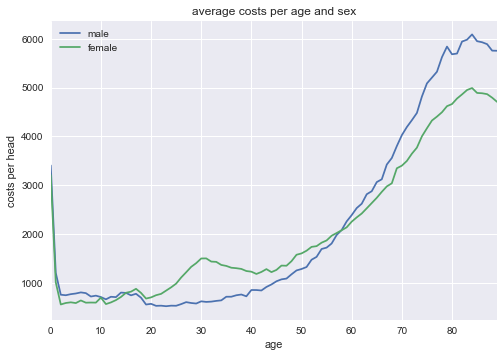

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure()
ax = costs_per_sex_age['M'].plot()
ax = costs_per_sex_age['V'].plot()
ax.set_xlabel('age')
ax.set_ylabel('costs per head')
ax.set_title('average costs per age and sex')
ax.legend(['male','female'])
fig.savefig("males.png")

---

**Exercise**

Finish the following code block to show how total obstetrics vary with 'age' and 'sex' (what would you guess&#x2026;).



In [1]:
obstetrics_per_sex_age = df_postal_code.groupby(['sex','age'])['obstetrics'].sum()

....

fig.savefig("obstetrics.png")

---

We can plot a histogram of the distribution of hospital care expenditure across postal code areas.



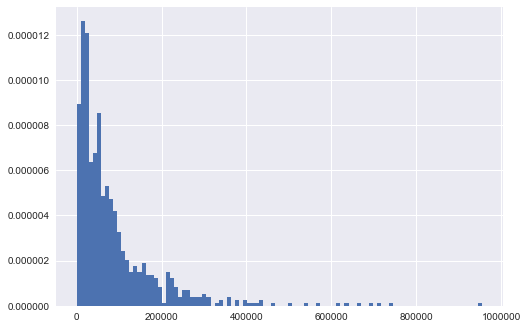

In [1]:
hospital_care_expenditure = df_postal_code.groupby(['age','POSTCODE_3'])['hospital_care'].sum()

plt.clf()
plt.hist(hospital_care_expenditure[7],normed = True, bins = 100)
plt.show()

---

**Exercise**

In which fraction of postal code areas does hospital expenditures on 50 year olds exceed 50000 euro? Finish the following code block to find out.



In [1]:
sum()/len()

---

Suppose you are interested in the effect of the deductible on health care expenditure. Why would the following graph help for this?



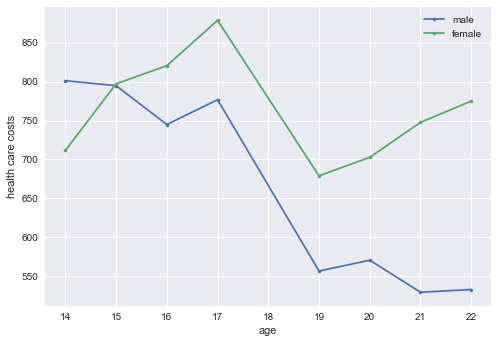

In [1]:
plt.style.use('seaborn')
plt.clf()
age_range = [14,15,16,17,19,20,21,22]

plt.plot(age_range,costs_per_sex_age['M'][age_range], marker='.', label = 'male')
plt.plot(age_range,costs_per_sex_age['V'][age_range], marker='.', label = 'female')
plt.xlabel('age')
plt.ylabel('health care costs')
plt.legend()
fig.savefig('fig14to22.png')


## plotly



Instead of `matplotlib` to plot, we can also use `plotly`. With `plotly` you can make interactive graphs. The graph runs on plotly's servers and can for instance be included in presentations.

We are going to plot the cumulative distribution functions of health care expenditure for different age groups. We first define the cumulative distribution function `ecdf`.



In [1]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1.0, len(x)+1.0) / len(x)
    return x, y

Then we define the $x$ and $y$ coordinates of the functions we want to plot: the `ecdf` of health care expenditures for ages 16, 17, 19 and 20.



In [1]:
x_16, y_16 = ecdf(df_postal_code.health_costs_per_head[(df_postal_code['age'] == 16)])
x_17, y_17 = ecdf(df_postal_code.health_costs_per_head[(df_postal_code['age'] == 17)])
x_19, y_19 = ecdf(df_postal_code.health_costs_per_head[(df_postal_code['age'] == 19)])
x_20, y_20 = ecdf(df_postal_code.health_costs_per_head[(df_postal_code['age'] == 20)])

We import plotly.



In [1]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

Finally, we define the graph itself. We specify the "Scatter's" and the layout. The web address can be used if you want to include this graph in a presentation.



In [1]:
age16 = Scatter(
    x=x_16,
    y=y_16,
    mode='markers+lines',
    name = 'age 16'
)
age17 = Scatter(
    x=x_17,
    y=y_17,
    mode='markers+lines',
    name = 'age 17'
)
age19 = Scatter(
    x=x_19,
    y=y_19,
    mode='markers+lines',
    name = 'age 19'
)
age20 = Scatter(
    x=x_20,
    y=y_20,
    mode='markers+lines',
    name = 'age 20'
)

layout = Layout(
    title='Health care expend. distribution functions',
    xaxis=XAxis(
        range=[0,3000],
        title='expenditure per head',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=YAxis(
        title='cum. distribution function',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = Data([age16,age17,age19,age20])
fig = Figure(data=data, layout=layout)
py.plot(fig, filename='Distribution functions of health care expenditure per head')
tls.embed("https://plot.ly/~janboone/301")

<plotly.tools.PlotlyDisplay object>


# A first look at machine learning



Python is used a lot in data science. If you are interested you can check out libraries like [TensorFlow](https://www.tensorflow.org/) and [keras](https://keras.io/). We will have a (brief) look at [scikit-learn](http://scikit-learn.org/stable/index.html). If you want to know more, go to [Datacamp](https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=1) and follow the course before your subscription runs out&#x2026;

We will use the data set above and see whether we can distinguish different age-categories based on their health care expenditure. From the dataframe we select the age categories 25 and 70. Then we use the expenditure per head in each category to predict the age-sex category of this postal code area.

As above we import the relevant libraries and data.



In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
df_postal_code = pd.read_csv('Vektis_Open_Databestand_Zorgverzekeringswet_2014_-_postcode3.csv', sep = ';')

We now use a slightly different way to get the data into shape and hence we rename the function.



In [1]:
def get_data_into_shape_2(df):
    df = df.rename_axis({
        'GESLACHT':'sex',
        'LEEFTIJDSKLASSE':'age',
        'GEMEENTENAAM':'MUNICIPALITY',
        'AANTAL_BSN':'number_citizens',
        'KOSTEN_MEDISCH_SPECIALISTISCHE_ZORG':'hospital_care',
        'KOSTEN_FARMACIE':'pharmaceuticals',
        'KOSTEN_TWEEDELIJNS_GGZ':'mental_care',
        'KOSTEN_HUISARTS_INSCHRIJFTARIEF':'GP_capitation',
        'KOSTEN_HUISARTS_CONSULT':'GP_fee_for_service',
        'KOSTEN_HUISARTS_OVERIG':'GP_other',
        'KOSTEN_MONDZORG':'dental_care',
        'KOSTEN_PARAMEDISCHE_ZORG_FYSIOTHERAPIE':'physiotherapy',
        'KOSTEN_KRAAMZORG':'maternity_care',
        'KOSTEN_VERLOSKUNDIGE_ZORG':'obstetrics',
        'KOSTEN_GERIATRISCHE_REVALIDATIEZORG':'geriatrics'
                        }, axis='columns')
    df.drop(['AANTAL_VERZEKERDEJAREN',
             'KOSTEN_HULPMIDDELEN',
             'KOSTEN_PARAMEDISCHE_ZORG_OVERIG',
             'KOSTEN_ZIEKENVERVOER_ZITTEND',
             'KOSTEN_ZIEKENVERVOER_LIGGEND',
             'KOSTEN_GRENSOVERSCHRIJDENDE_ZORG',
             'KOSTEN_OVERIG',
             'KOSTEN_GENERALISTISCHE_BASIS_GGZ',
             'KOSTEN_EERSTELIJNS_ONDERSTEUNING'],inplace=True,axis=1)
    df.drop(df.index[[0]], inplace=True)
    return df

With the function above, we first get the data into the shape that we want.



In [1]:
df_postal_code = get_data_into_shape_2(df_postal_code)

We are going to consider the ages 25 and 70. As age can be integer or string, we include both in the list of age-values that we wish to select.



In [1]:
df_25_70 = df_postal_code[df_postal_code['age'].isin(['25','70', 25, 70])]

We define the groups as "25M" for 25 year old males. In order to add the columns "sex" and "age", they need to be strings as in python adding the strings \`"abc"+"def"\` yields \`"abcdef"\`; which is exactly what we want.



In [1]:
df_25_70.age = df_25_70.age.astype('str')
df_25_70.sex = df_25_70.sex.astype('str')
df_25_70['target'] = df_25_70.age+df_25_70.sex

This combination of age and sex (4 categories) is the variable that we want to predict. Hence, we call the variable \`target\`. We turn \`target\` into a category and find that there are indeed 4 of these categories.



In [1]:
df_25_70['target'] = df_25_70['target'].astype('category')
df_25_70['target'].cat.categories

Index(['25.0M', '25V', '70M', '70V'], dtype='object')

With \`.cat.codes\` we turn our categories into integers 0, 1, 2, 3.



In [1]:
df_25_70['target'].cat.codes.describe()

count    3031.000000
mean        1.501815
std         1.119250
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         3.000000
dtype: float64

We redefine expenditures in each care category as per head expenditure in the 3 digit postal code area. We then think of each area as being an "individual". Based on the individuals expenditure per care category, we predict age and sex. The following code redefines for each care category the total expenditure into an expenditure per head.



In [1]:
care_categories = ['hospital_care', 'pharmaceuticals', 'mental_care', 'GP_capitation', 'GP_fee_for_service', 'GP_other', 'dental_care', 'physiotherapy', 'maternity_care', 'obstetrics', 'geriatrics']

for variable in care_categories:
    df_25_70[variable] = df_25_70[variable]/df_25_70['number_citizens']

---

**Exercise**

Get a sense of what the dataframe `df_25_70` looks like.



---

The variable \`target\` is the variable we would like to predict. Hence, we call it $y$. We choose a subset of health care expenditure categories (you can experiment with this yourself) as predictors (independent variables) and denote the variables in this subset by $X$.



In [1]:
y = df_25_70.target

subset_care_categories = ['physiotherapy', 'obstetrics', 'geriatrics', 'pharmaceuticals']
X = df_25_70[subset_care_categories]

In this version of the notebook we use four cost categories to separate the different age-sex types. The algorithm below makes this separation in four dimensional space. To get a first intuition, we can consider the data points in two dimensional space, using pairwise combinations of the cost categories. The function \`scatter\_matrix\` does this for each pairwise combination of the cost categories. By turning the variable \`target\` into integers 0,1,2,3 we can use this variable to color the points. Each category has its own color. For this translation to integers, we use the \`.cat.codes\` attribute that we saw above.



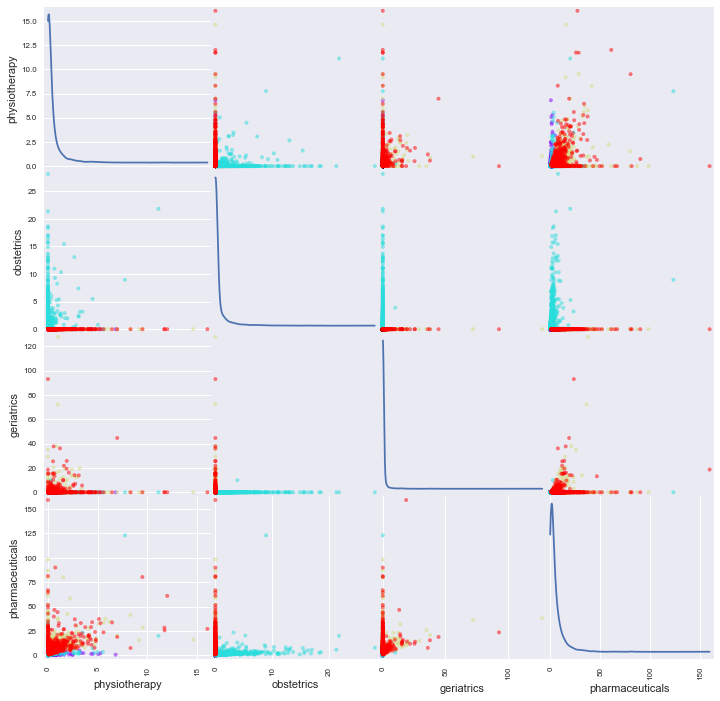

In [1]:
from pandas.tools.plotting import scatter_matrix # Import the function to plot a scatterplot
    
%matplotlib inline

scatter_matrix(
    X,  # drop the none feature columns
    figsize=(12, 12),                                             # square figuresize for the matrix
    alpha=0.5,                                                    # alpha of 0.5 to see overlapping dots
    s=50,                                                         # fixed size of 50
    c=[plt.cm.get_cmap('rainbow', 4)(idx) for idx in df_25_70['target'].cat.codes],
    diagonal='kde');                                              # diagonal line are feature distributions

In order to classify points, we use the k-neighbours method. The idea is as follows. To classify a point, we consider its $k$ closest neighbours. If the majority of these neighbours have label, say '70M', then we classify this point also as '70M'.

As the goal here is to predict, we do not worry about concepts like normal distribution, p-values, co-linearity. We simply split the data set into two subsets. We estimate (train) the model on the first data set. Then we apply the estimated model on the other (test) data. For the test data we calculate how often we get it right.

From scikit-learn we import the function \`train\_test\_split\`. This function splits our data $X,y$ into a training and a testing data set. The size of the test data set is set at 30% here. We can set the seed (21) for the random number generator &#x2013;don't worry if this does not mean anything to you. Finally, we stratify the data such that the distribution of labels is the same in the training and testing data.

Here we set the number of neighbours equal to $k=8$. Higher values of $k$ give smoother results and lead to a "simpler" model but misses local subtleties. The extreme is where $k=n$ (the number of observations). Then all observations get the same label (the mode of the distribution). 

Then we fit this model \`knn\` to our training data. After we fitted the model, we can predict labels in the test data set. The score indicates the percentage of labels we got right in the test data.



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.724175824176

Now let us focus on women with age 25 and 70. Intuitively, with categories like 'obstetrics' and 'geriatrics' we should be able to separate these categories perfectly. And indeed we are.



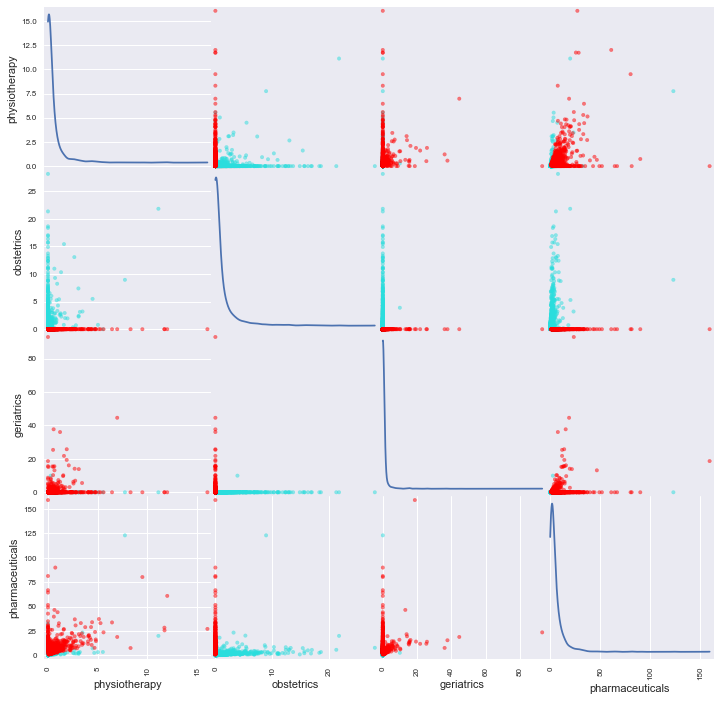

In [1]:
df_female = df_25_70[df_25_70['target'].isin(['25V','70V'])]

y_f = df_female.target

subset_care_categories = ['physiotherapy', 'obstetrics', 'geriatrics', 'pharmaceuticals']
X_f = df_female[subset_care_categories]

scatter_matrix(
    X_f,  # drop the none feature columns
    figsize=(12, 12),                                             # square figuresize for the matrix
    alpha=0.5,                                                    # alpha of 0.5 to see overlapping dots
    s=50,                                                         # fixed size of 50
    c=[plt.cm.get_cmap('rainbow', 4)(idx) for idx in df_female['target'].cat.codes],
    diagonal='kde');                                              # diagonal line are feature distributions

---

**Exercise**

Use the $k$-neighbors method from above on the data $X_f,y_f$. That is, split the data into test and training sets, fit the model on the training data and then show that on the test data you get a score close to 100%.



---

